# 워드클라우드 - Soynlp version

In [1]:
import re, joblib

In [2]:
with open('data/gift.txt', encoding='utf-8') as file:
    gift_text = file.read()

In [3]:
new_gift_text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', gift_text)

In [4]:
new_gift_text[:100]

' 반지 목걸이         커플 가디건이나 커플 모자는 어떠신지요     몇개 추천제품들 투척하고 갑니다 ㅎㅎ 더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건       '

- Soynlp 명사 추출기

In [12]:
from soynlp.tokenizer import NounLMatchTokenizer

noun_scores = joblib.load('data/noun_scores.pkl')
noun_tok = NounLMatchTokenizer(noun_scores)
gift_list = noun_tok.tokenize(new_gift_text)

In [13]:
gift_list[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '어떠', '몇개', '추천제품들', '투척']

In [14]:
len(gift_list)

16655

In [7]:
# 한글 폰트 사용
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 반복 처리

In [8]:
import nltk

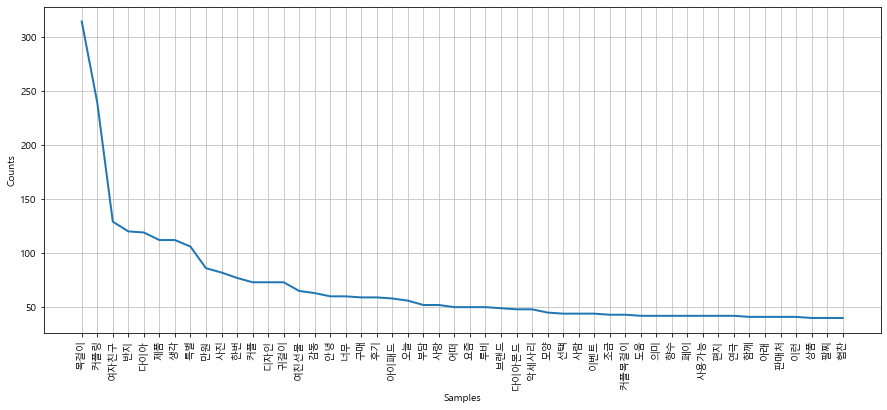

In [26]:
# 아래 줄과 반복해서 불용어를 제거
gf_gift = nltk.Text(gift_list, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [16]:
# stop_list = ['선물','추천']
stop_words = '선물 추천 가격 좋아 가능 여친 참고 고급 정말 세대 제작 인기 여자 유명 엄청 배송 다양 사용 변경 저렴'
stop_list = stop_words.split()
gift_list = [token for token in gift_list if token not in stop_list]

- Wordcloud 그리기

In [18]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [19]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 314),
 ('커플링', 239),
 ('여자친구', 129),
 ('반지', 120),
 ('다이아', 119),
 ('제품', 112),
 ('생각', 112),
 ('특별', 106),
 ('만원', 86),
 ('사진', 82)]

In [20]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

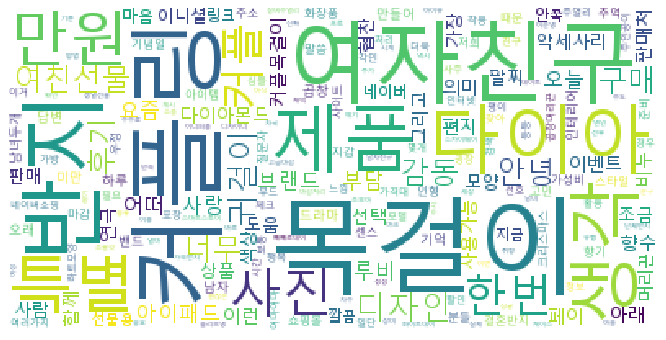

In [21]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 하트 그림에 표시하기

In [22]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [23]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.3, mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

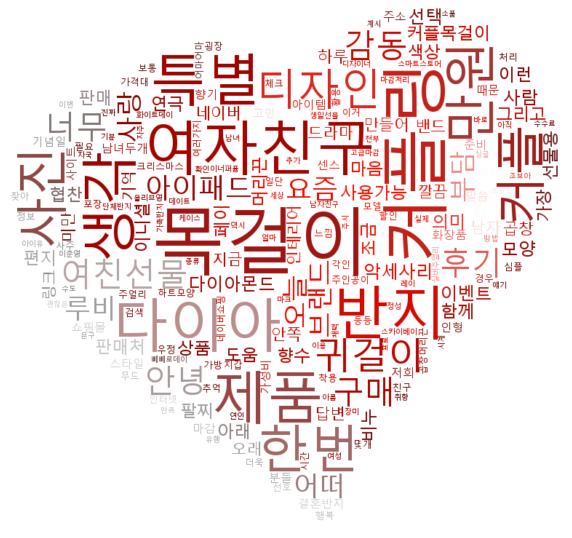

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()